In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


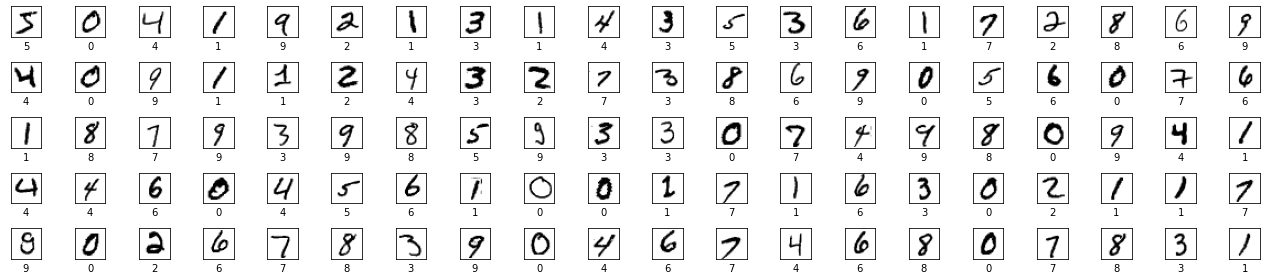

In [3]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(18,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [4]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
x_train_normalized = x_train.reshape(-1, 28,28,1)/255.0
x_test_normalized = x_test.reshape(-1, 28,28,1)/255.0


In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
adam_model=model
sgd_model=model
rmsprop_model=model

In [7]:
adam_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
sgd_model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
rmsprop_model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Without The Normalized Data 

In [10]:
h = adam_model.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 36s 23ms/step - loss: 0.3038 - accuracy: 0.9257 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0950 - accuracy: 0.9753 - val_loss: 0.0770 - val_accuracy: 0.9808
Epoch 3/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0849 - accuracy: 0.9789 - val_loss: 0.0898 - val_accuracy: 0.9801
Epoch 4/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0796 - accuracy: 0.9812 - val_loss: 0.2752 - val_accuracy: 0.9436
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0819 - accuracy: 0.9828 - val_loss: 0.1368 - val_accuracy: 0.9743


In [11]:
test_loss, test_acc = adam_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1118 - accuracy: 0.9752

Test accuracy: 0.9751999974250793


In [12]:
x = sgd_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0855 - accuracy: 0.9821 - val_loss: 0.0804 - val_accuracy: 0.9823
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0766 - accuracy: 0.9845 - val_loss: 0.0959 - val_accuracy: 0.9845
Epoch 3/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0963 - accuracy: 0.9832 - val_loss: 0.0994 - val_accuracy: 0.9805
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0924 - accuracy: 0.9830 - val_loss: 0.1660 - val_accuracy: 0.9845
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1020 - accuracy: 0.9833 - val_loss: 0.1313 - val_accuracy: 0.9783


In [13]:
test_loss, test_acc = sgd_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1220 - accuracy: 0.9789

Test accuracy: 0.9789000153541565


In [14]:
y = rmsprop_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1137 - accuracy: 0.9829 - val_loss: 0.1999 - val_accuracy: 0.9765
Epoch 2/5
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1163 - accuracy: 0.9829 - val_loss: 0.2618 - val_accuracy: 0.9783
Epoch 3/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1235 - accuracy: 0.9833 - val_loss: 0.1407 - val_accuracy: 0.9770
Epoch 4/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1270 - accuracy: 0.9817 - val_loss: 0.1784 - val_accuracy: 0.9792
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1156 - accuracy: 0.9830 - val_loss: 0.1305 - val_accuracy: 0.9835


In [15]:
test_loss, test_acc = rmsprop_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1441 - accuracy: 0.9842

Test accuracy: 0.9842000007629395


# Comparison without normalized data between  :  Adam vs SGD vs RMSProp 

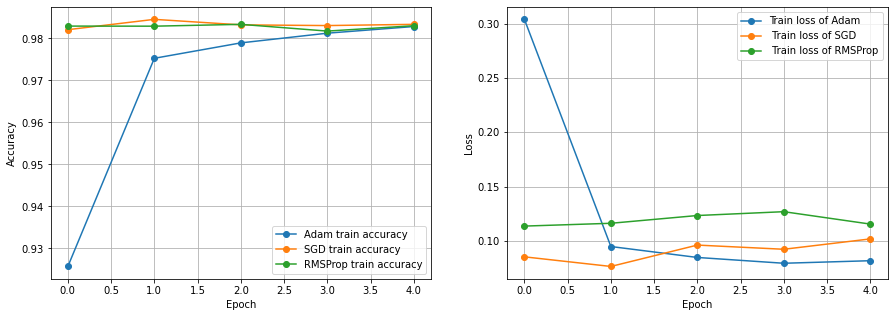

In [16]:
 plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Train loss of Adam')
plt.plot(x.history['loss'], 'o-', label=' Train loss of SGD')
plt.plot(y.history['loss'], 'o-', label=' Train loss of RMSProp')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Comments

# With Normalized Data

In [17]:
h_normalized = adam_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2140 - accuracy: 0.9310 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 2/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0391 - accuracy: 0.9886 - val_loss: 0.0483 - val_accuracy: 0.9871
Epoch 3/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.0451 - val_accuracy: 0.9894
Epoch 4/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0264 - accuracy: 0.9924 - val_loss: 0.0520 - val_accuracy: 0.9872
Epoch 5/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0244 - accuracy: 0.9931 - val_loss: 0.0674 - val_accuracy: 0.9866


In [18]:
test_loss, test_acc = adam_model.evaluate(x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0626 - accuracy: 0.9874

Test accuracy: 0.9873999953269958


In [19]:
x_normalized =sgd_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0460 - val_accuracy: 0.9903
Epoch 2/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0204 - accuracy: 0.9947 - val_loss: 0.0442 - val_accuracy: 0.9897
Epoch 3/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0206 - accuracy: 0.9947 - val_loss: 0.0671 - val_accuracy: 0.9890
Epoch 4/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.0696 - val_accuracy: 0.9894
Epoch 5/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0154 - accuracy: 0.9958 - val_loss: 0.0639 - val_accuracy: 0.9899


In [42]:
test_loss, test_acc = sgd_model.evaluate(x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0808 - accuracy: 0.9897

Test accuracy: 0.9897000193595886


In [21]:
y_normalized = rmsprop_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.0516 - val_accuracy: 0.9913
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0150 - accuracy: 0.9964 - val_loss: 0.0769 - val_accuracy: 0.9873
Epoch 3/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0539 - val_accuracy: 0.9911
Epoch 4/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.0799 - val_accuracy: 0.9890
Epoch 5/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0139 - accuracy: 0.9968 - val_loss: 0.0892 - val_accuracy: 0.9886


In [22]:
test_loss, test_acc =rmsprop_model.evaluate (x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0808 - accuracy: 0.9897

Test accuracy: 0.9897000193595886


# Normalized vs without Normalized data (adam)


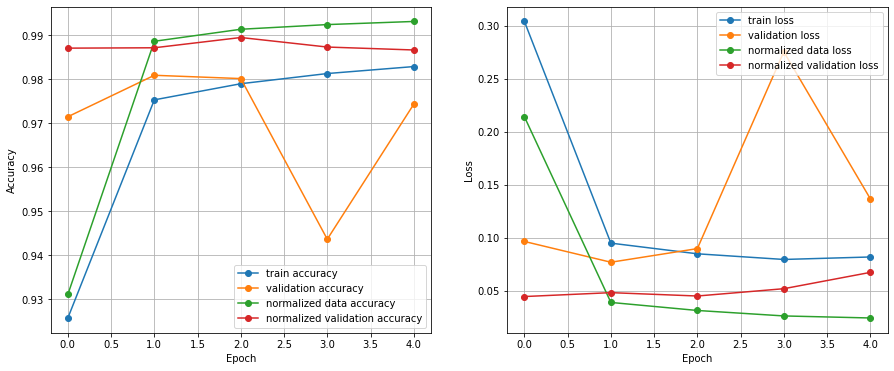

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_normalized.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_normalized.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Analyzing the affect of using and not using data normalization:

Using normalized data in this model we got more accuracy than prior.
We can see in the above mentioned graph that the Adam's function performed much better accuracy in 1st epoch for normalized data. If we compare then we will see that the comparsion of accuracy was like this Adam>SGD>RMSprop.  Apparetly By using the data visualization we achieved more precision in our data training . 

From the below visualization graph, we find in every optimization function has more accuracy for normalization data.

# Displaying   normalized data in various optimization function 

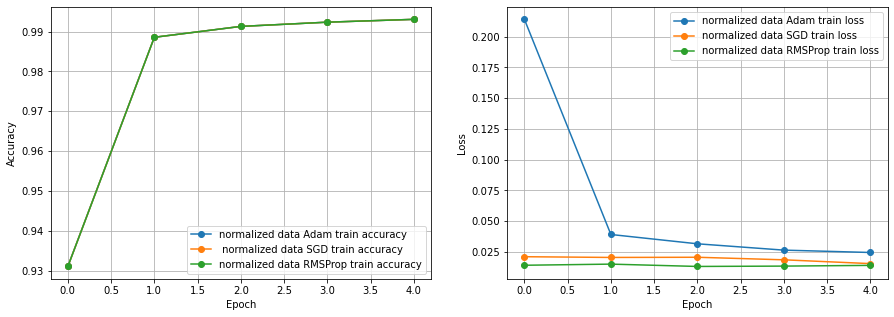

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data Adam train accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label=' normalized data SGD train accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data Adam train loss')
plt.plot(x_normalized.history['loss'], 'o-', label='normalized data SGD train loss')
plt.plot(y_normalized.history['loss'], 'o-', label='normalized data RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Predictions

In [43]:
predictions = adam_model.predict(x_test)

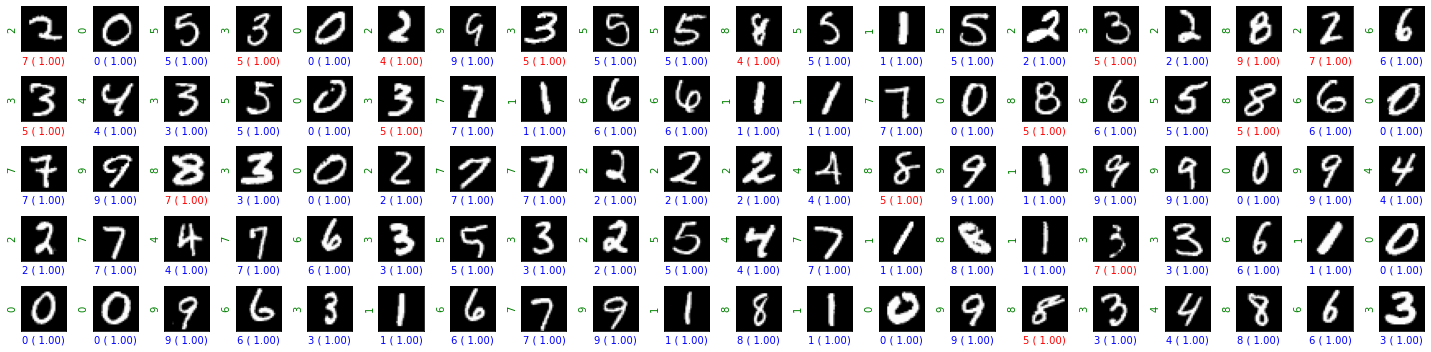

In [34]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = adam_model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()